In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE
from tabulate import tabulate
import json
import numpy as np

# 1. Prepare data

In [38]:
# jobs = pd.read_csv("../data/clean job_data_1905 have new salary handler.csv")
jobs = pd.read_csv("../data/clean data all.csv")
jobs = jobs.drop(columns = ['Sex', 'Contract Type'])
jobs_test = pd.read_csv("../data/clean data upto and mean.csv")
jobs_test = jobs_test.drop(columns = ['Sex', 'Contract Type'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,20500000.0,Nhân viên,2 năm,java,tiếng anh,Hà Nội
1,36500000.0,Nhân viên,2 năm,Khác,tiếng anh,Hồ Chí Minh
2,22500000.0,Trưởng/Phó phòng,2 năm,Khác,Không yêu cầu,Hà Nội
3,22500000.0,Trưởng nhóm,3 năm,Khác,Không yêu cầu,Hà Nội
4,30000000.0,Nhân viên,3 năm,php,Không yêu cầu,Hà Nội


In [39]:
# jobs_test = jobs_test.drop(columns = ['Lang'])

In [40]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                4386 non-null   float64
 1   Level                 4386 non-null   object 
 2   Year of Experience    4386 non-null   object 
 3   Programming Language  4386 non-null   object 
 4   Language              4386 non-null   object 
 5   Location              4386 non-null   object 
dtypes: float64(1), object(5)
memory usage: 205.7+ KB


# 2. Feture engineering

- Duplicate

In [41]:
# jobs = jobs.groupby(['Level', 'Year of Experience', 'Programming Language','Language','Location']).mean().reset_index()

## 2.1 Encoding

- StandardScaler for 'Salary'

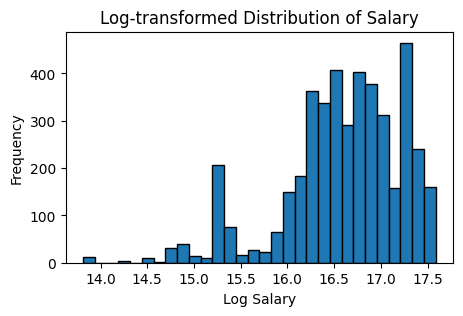

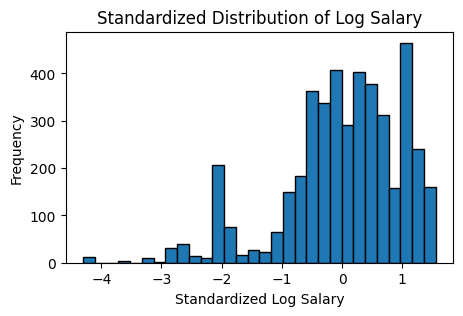

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có DataFrame jobs với dữ liệu ban đầu
# Áp dụng Log Transformation
jobs['Salary'] = np.log(jobs['Salary'])

# Kiểm tra phân phối sau khi biến đổi Log
plt.figure(figsize=(5, 3))
plt.hist(jobs['Salary'], bins=30, edgecolor='k')
plt.title('Log-transformed Distribution of Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.show()

# Chuẩn hóa phân phối chuẩn cho biến Salary_log
scaler = StandardScaler()
jobs['Salary'] = scaler.fit_transform(jobs[['Salary']])

# Kiểm tra phân phối sau khi chuẩn hóa
plt.figure(figsize=(5, 3))
plt.hist(jobs['Salary'], bins=30, edgecolor='k')
plt.title('Standardized Distribution of Log Salary')
plt.xlabel('Standardized Log Salary')
plt.ylabel('Frequency')
plt.show()


In [43]:
# Áp dụng Log Transformation cho tập test
jobs_test['Salary'] = np.log(jobs_test['Salary'])

jobs_test['Salary'] = scaler.transform(jobs_test[['Salary']], copy=True)
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.814520,Nhân viên,3 năm,Khác,Không yêu cầu,Hà Nội
1,-0.726527,Nhân viên,1 năm,Khác,Không yêu cầu,Hồ Chí Minh
2,-2.594512,Thực tập sinh,Dưới 1 năm,Khác,Không yêu cầu,Hà Nội
3,-0.204485,Nhân viên,1 năm,Khác,tiếng nhật,Hà Nội
4,-0.204485,Nhân viên,1 năm,Khác,tiếng anh,Hà Nội


In [44]:
# # Tạo các biểu đồ trên cùng một hàng
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# # Kiểm tra phân phối ban đầu của biến Salary
# axes[0].hist(jobs['Salary'], bins=30, edgecolor='k')
# axes[0].set_title('Initial Distribution of Salary')
# axes[0].set_xlabel('Salary')
# axes[0].set_ylabel('Frequency')

# # Chuẩn hóa phân phối chuẩn cho biến Salary
# scaler = StandardScaler()
# jobs['Salary'] = scaler.fit_transform(jobs[['Salary']])

# # Kiểm tra phân phối sau khi chuẩn hóa
# axes[1].hist(jobs['Salary'], bins=30, edgecolor='k')
# axes[1].set_title('Standardized Distribution of Salary')
# axes[1].set_xlabel('Standardized Salary')
# axes[1].set_ylabel('Frequency')

# # Hiển thị các biểu đồ
# plt.tight_layout()
# plt.show()

In [45]:
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.387213,Nhân viên,2 năm,java,tiếng anh,Hà Nội
1,1.282264,Nhân viên,2 năm,Khác,tiếng anh,Hồ Chí Minh
2,0.531645,Trưởng/Phó phòng,2 năm,Khác,Không yêu cầu,Hà Nội
3,0.531645,Trưởng nhóm,3 năm,Khác,Không yêu cầu,Hà Nội
4,0.977988,Nhân viên,3 năm,php,Không yêu cầu,Hà Nội


- Encoding for 'Level'

In [46]:
encoder = OrdinalEncoder(categories=[['Thực tập sinh', 'Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc']])
encoded_level = encoder.fit_transform(jobs[['Level']])
jobs['Level'] = encoded_level
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.387213,1.0,2 năm,java,tiếng anh,Hà Nội
1,1.282264,1.0,2 năm,Khác,tiếng anh,Hồ Chí Minh
2,0.531645,3.0,2 năm,Khác,Không yêu cầu,Hà Nội
3,0.531645,2.0,3 năm,Khác,Không yêu cầu,Hà Nội
4,0.977988,1.0,3 năm,php,Không yêu cầu,Hà Nội


In [47]:
jobs_test['Level'] = encoder.transform(jobs_test[['Level']])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.814520,1.0,3 năm,Khác,Không yêu cầu,Hà Nội
1,-0.726527,1.0,1 năm,Khác,Không yêu cầu,Hồ Chí Minh
2,-2.594512,0.0,Dưới 1 năm,Khác,Không yêu cầu,Hà Nội
3,-0.204485,1.0,1 năm,Khác,tiếng nhật,Hà Nội
4,-0.204485,1.0,1 năm,Khác,tiếng anh,Hà Nội


- Encoding for 'Lang'

In [48]:
# encoder = OrdinalEncoder(categories=[['vi', 'en']])
# encoded_l = encoder.fit_transform(jobs[['Lang']])
# jobs['Lang'] = encoded_l
# jobs.head()

In [49]:
# jobs_test['Lang'] = encoder.transform(jobs_test[['Lang']])
# jobs_test.head()

# one_hot_encoder = OneHotEncoder()
# job_pl = one_hot_encoder.fit_transform(jobs['Lang'])

# jobs = pd.concat([jobs, job_pl], axis=1)
# jobs = jobs.drop(columns = ['Lang'])
# jobs.head()

In [50]:
# one_hot_encoder = OneHotEncoder()
# job_pl = one_hot_encoder.fit_transform(jobs_test['Lang'])

# jobs_test = pd.concat([jobs_test, job_pl], axis=1)
# jobs_test = jobs_test.drop(columns = ['Lang'])
# jobs_test.head()

- Encoding for 'Year of Experience'

In [51]:
encoder = OrdinalEncoder(categories=[['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm']])
encoded_YoE = encoder.fit_transform(jobs[['Year of Experience']])
jobs['Year of Experience'] = encoded_YoE
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.387213,1.0,3.0,java,tiếng anh,Hà Nội
1,1.282264,1.0,3.0,Khác,tiếng anh,Hồ Chí Minh
2,0.531645,3.0,3.0,Khác,Không yêu cầu,Hà Nội
3,0.531645,2.0,4.0,Khác,Không yêu cầu,Hà Nội
4,0.977988,1.0,4.0,php,Không yêu cầu,Hà Nội


In [52]:
jobs_test['Year of Experience'] = encoder.transform(jobs_test[['Year of Experience']])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.814520,1.0,4.0,Khác,Không yêu cầu,Hà Nội
1,-0.726527,1.0,2.0,Khác,Không yêu cầu,Hồ Chí Minh
2,-2.594512,0.0,1.0,Khác,Không yêu cầu,Hà Nội
3,-0.204485,1.0,2.0,Khác,tiếng nhật,Hà Nội
4,-0.204485,1.0,2.0,Khác,tiếng anh,Hà Nội


- Encoding for 'Programming Language'

In [53]:
encoder = TargetEncoder()
encoded_pl = encoder.fit_transform(jobs['Programming Language'], jobs['Salary'])
jobs['Programming Language'] = encoded_pl

In [54]:
jobs_test['Programming Language'] = encoder.transform(jobs_test[['Programming Language']])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language,Location
0,0.814520,1.0,4.0,-0.265632,Không yêu cầu,Hà Nội
1,-0.726527,1.0,2.0,-0.265632,Không yêu cầu,Hồ Chí Minh
2,-2.594512,0.0,1.0,-0.265632,Không yêu cầu,Hà Nội
3,-0.204485,1.0,2.0,-0.265632,tiếng nhật,Hà Nội
4,-0.204485,1.0,2.0,-0.265632,tiếng anh,Hà Nội


- Encoding for 'Language'

In [55]:
# encoder = TargetEncoder()
# encoded_language = encoder.fit_transform(jobs['Language'], jobs['Salary'])
# jobs['Language'] = encoded_language
# from category_encoders import OneHotEncoder

one_hot_encoder = OneHotEncoder()
job_pl = one_hot_encoder.fit_transform(jobs['Language'])

jobs = pd.concat([jobs, job_pl], axis=1)
jobs = jobs.drop(columns = ['Language'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Location,Language_1,Language_2,Language_3
0,0.387213,1.0,3.0,0.570623,Hà Nội,1,0,0
1,1.282264,1.0,3.0,-0.265632,Hồ Chí Minh,1,0,0
2,0.531645,3.0,3.0,-0.265632,Hà Nội,0,1,0
3,0.531645,2.0,4.0,-0.265632,Hà Nội,0,1,0
4,0.977988,1.0,4.0,-0.049208,Hà Nội,0,1,0


In [56]:
job_test_pl = one_hot_encoder.transform(jobs_test['Language'])

jobs_test = pd.concat([jobs_test, job_pl], axis=1)
jobs_test = jobs_test.drop(columns = ['Language'])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Location,Language_1,Language_2,Language_3
0,0.814520,1.0,4.0,-0.265632,Hà Nội,1,0,0
1,-0.726527,1.0,2.0,-0.265632,Hồ Chí Minh,1,0,0
2,-2.594512,0.0,1.0,-0.265632,Hà Nội,0,1,0
3,-0.204485,1.0,2.0,-0.265632,Hà Nội,0,1,0
4,-0.204485,1.0,2.0,-0.265632,Hà Nội,0,1,0


- Encoding for 'Location'

In [57]:
# encoder = TargetEncoder()
# encoded_location = encoder.fit_transform(jobs['Location'], jobs['Salary'])
# jobs['Location'] = encoded_location

one_hot_encoder = OneHotEncoder()
job_pl = one_hot_encoder.fit_transform(jobs['Location'])

jobs = pd.concat([jobs, job_pl], axis=1)
jobs = jobs.drop(columns = ['Location'])
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4
0,0.387213,1.0,3.0,0.570623,1,0,0,1,0,0,0
1,1.282264,1.0,3.0,-0.265632,1,0,0,0,1,0,0
2,0.531645,3.0,3.0,-0.265632,0,1,0,1,0,0,0
3,0.531645,2.0,4.0,-0.265632,0,1,0,1,0,0,0
4,0.977988,1.0,4.0,-0.049208,0,1,0,1,0,0,0


In [58]:
job_test_pl = one_hot_encoder.transform(jobs_test['Location'])

jobs_test = pd.concat([jobs_test, job_pl], axis=1)
jobs_test = jobs_test.drop(columns = ['Location'])
jobs_test.head()

,Salary,Level,Year of Experience,Programming Language,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4
0,0.814520,1.0,4.0,-0.265632,1,0,0,1,0,0,0
1,-0.726527,1.0,2.0,-0.265632,1,0,0,0,1,0,0
2,-2.594512,0.0,1.0,-0.265632,0,1,0,1,0,0,0
3,-0.204485,1.0,2.0,-0.265632,0,1,0,1,0,0,0
4,-0.204485,1.0,2.0,-0.265632,0,1,0,1,0,0,0


In [59]:
jobs.head()

,Salary,Level,Year of Experience,Programming Language,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4
0,0.387213,1.0,3.0,0.570623,1,0,0,1,0,0,0
1,1.282264,1.0,3.0,-0.265632,1,0,0,0,1,0,0
2,0.531645,3.0,3.0,-0.265632,0,1,0,1,0,0,0
3,0.531645,2.0,4.0,-0.265632,0,1,0,1,0,0,0
4,0.977988,1.0,4.0,-0.049208,0,1,0,1,0,0,0


In [60]:
jobs = jobs.groupby(['Level', 'Year of Experience', 'Programming Language','Language_1', 'Language_2', 'Language_3', 'Location_1', 'Location_2', 'Location_3', 'Location_4']).mean().reset_index()

In [61]:
jobs

,Level,Year of Experience,Programming Language,Language_1,Language_2,Language_3,Location_1,Location_2,Location_3,Location_4,Salary
0,0.0,0.0,-0.265632,0,0,1,0,0,0,1,-2.355344
1,0.0,0.0,-0.265632,0,0,1,0,1,0,0,-3.446770
2,0.0,0.0,-0.265632,0,0,1,1,0,0,0,-2.076698
3,0.0,0.0,-0.265632,0,1,0,0,0,0,1,-2.296949
4,0.0,0.0,-0.265632,0,1,0,0,1,0,0,-3.300125
...,...,...,...,...,...,...,...,...,...,...,...
434,4.0,6.0,-0.265632,0,1,0,1,0,0,0,0.531645
435,5.0,3.0,-0.265632,0,1,0,1,0,0,0,0.695113
436,5.0,4.0,-0.265632,0,1,0,1,0,0,0,-0.380316
437,5.0,6.0,-0.265632,0,1,0,1,0,0,0,1.518392


## 2.2 Correlation with target variable

In [62]:
# Tính toán ma trận tương quan
correlation_matrix = jobs.corr()

# Hiển thị tương quan của từng đặc trưng với biến mục tiêu
target_correlation = correlation_matrix['Salary']
print(target_correlation)

Level                   0.478034
Year of Experience      0.725629
Programming Language    0.140212
Language_1             -0.018579
Language_2             -0.036579
Language_3              0.087068
Location_1              0.168381
Location_2             -0.048753
Location_3             -0.083303
Location_4             -0.130602
Salary                  1.000000
Name: Salary, dtype: float64


# 3. Training

In [63]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    'XGB': xgb.XGBRegressor()
}

In [64]:
X = jobs.drop(columns = ['Salary'])
y = jobs['Salary']

In [65]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

# Khởi tạo KFold để kiểm định chéo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    # Đánh giá mô hình sử dụng cross-validation và r2 làm thước đo
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    # Tính R² trung bình
    mean_r2 = np.mean(scores)
    results.append((name, mean_r2))

# Sắp xếp kết quả theo R² Score từ cao xuống thấp
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

# In kết quả
print(results_df)

# Lấy tên của mô hình có điểm số R² cao nhất
model_best = results_df['Model'].iloc[0]
print("Best performing model:", model_best)

                       Model  R2 Score
6                        SVR  0.809308
4      RandomForestRegressor  0.780544
3  GradientBoostingRegressor  0.771004
7                        XGB  0.687387
5      DecisionTreeRegressor  0.665613
1                      Ridge  0.631534
0           LinearRegression  0.631334
2                      Lasso  0.305947
Best performing model: SVR


In [66]:

# Khởi tạo KFold để kiểm định chéo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
# Định nghĩa mô hình
if model_best == 'SVR':
    model = SVR(kernel='linear')
else :
    model = models['RandomForestRegressor']

# Lặp qua số lượng đặc trưng từ 2 đến số lượng đặc trưng tối đa
for i in range(2, len(X.columns) + 1):
    # Thiết lập RFE với số đặc trưng hiện tại
    selector = RFE(model, n_features_to_select=i, step=1)
    selector.fit(X, y)  # Lưu ý là sử dụng toàn bộ dữ liệu X, y
    
    # Đặc trưng được chọn
    selected_features = X.columns[selector.support_]
    
    # Tạo tập dữ liệu chỉ với các đặc trưng được chọn
    X_selected = selector.transform(X)
    
    # Đánh giá mô hình sử dụng cross-validation
    scores = cross_val_score(model, X_selected, y, cv=kf, scoring='r2')
    
    # Tính R² Score trung bình
    mean_r2 = np.mean(scores)
    
    # Lưu kết quả
    results.append((i, selected_features.tolist(), mean_r2))

# Chuyển kết quả vào DataFrame và sắp xếp theo R²
results_df = pd.DataFrame(results, columns=['Num Features', 'Features', 'R2 Score'])
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# In kết quả
print(results_df)

# Lưu các đặc trưng quan trọng nhất từ mô hình tốt nhất
variable_important = results_df.iloc[0, 1]
print("Most important features:", variable_important)


   Num Features                                           Features  R2 Score
3             5  [Level, Year of Experience, Programming Langua...  0.608575
4             6  [Level, Year of Experience, Programming Langua...  0.605297
5             7  [Level, Year of Experience, Programming Langua...  0.604105
6             8  [Level, Year of Experience, Programming Langua...  0.601957
7             9  [Level, Year of Experience, Programming Langua...  0.601938
8            10  [Level, Year of Experience, Programming Langua...  0.601911
2             4  [Level, Programming Language, Language_3, Loca...  0.260093
1             3          [Level, Programming Language, Language_3]  0.257246
0             2                      [Level, Programming Language]  0.234066
Most important features: ['Level', 'Year of Experience', 'Programming Language', 'Language_3', 'Location_3']


In [67]:

# # Khởi tạo KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# results = []
# # Định nghĩa mô hình SVR
# model = SVR(kernel='linear')  # Lựa chọn kernel 'linear' hoặc bạn có thể thử 'rbf', 'poly',...

# # Lặp qua số lượng đặc trưng từ 2 đến số lượng đặc trưng tối đa
# for i in range(2, X.shape[1] + 1):
#     # Thiết lập RFE với số đặc trưng hiện tại
#     selector = RFE(model, n_features_to_select=i, step=1)
#     selector.fit(X, y)
    
#     # Đặc trưng được chọn
#     selected_features = X.columns[selector.support_]
    
#     # Tạo tập dữ liệu chỉ với các đặc trưng được chọn
#     X_selected = selector.transform(X)
    
#     # Đánh giá mô hình sử dụng cross-validation
#     scores = cross_val_score(model, X_selected, y, cv=kf, scoring='r2')
    
#     # Tính R² Score trung bình
#     mean_r2 = np.mean(scores)
    
#     # Lưu kết quả
#     results.append((i, selected_features.tolist(), mean_r2))

# # Chuyển kết quả vào DataFrame và sắp xếp theo R²
# results_df = pd.DataFrame(results, columns=['Num Features', 'Features', 'R2 Score'])
# results_df = results_df.sort_values(by='R2 Score', ascending=False)

# # In kết quả
# print(results_df)

# # Lưu các đặc trưng quan trọng nhất từ mô hình tốt nhất
# variable_important = results_df.iloc[0, 1]
# print("Most important features:", variable_important)


In [68]:
# Danh sách các mô hình và tham số tương ứng
models = {
    'RandomForestRegressor': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }),
    'XGBRegressor': (xgb.XGBRegressor(), {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }),
    'SVR': (SVR(), {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    })
}

In [69]:

# Phân chia tập dữ liệu
X = jobs[variable_important]
y = jobs['Salary']

# Kết quả lưu tham số tốt nhất
best_params = {}

KFold = KFold(n_splits=5, shuffle=True, random_state=42)

# Đào tạo và điều chỉnh mô hình cho từng loại
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    
    # Thiết lập Grid Search với kiểm định chéo
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=KFold, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X, y)
    
    # Lưu tham số tốt nhất
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Ghi kết quả vào file JSON
with open('best_params_new.json', 'w') as fp:
    json.dump(best_params, fp)

print("All best parameters have been saved to 'best_params_new.json'.")


Training RandomForestRegressor...
Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\

Best parameters for RandomForestRegressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training XGBRegressor...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for XGBRegressor: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Training GradientBoostingRegressor...
Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Mai Xuan Truong\AppData\Local\Programs\Python\

Best parameters for GradientBoostingRegressor: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Training SVR...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
All best parameters have been saved to 'best_params_new.json'.


In [70]:
from sklearn.model_selection import cross_val_score, KFold
# Đọc file JSON với các tham số tối ưu
with open('best_params_new.json', 'r') as fp:
    best_params = json.load(fp)

# Tạo dictionary của các mô hình đã cấu hình với random_state và tham số tối ưu
models_configured = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42, **best_params['RandomForestRegressor']),
    'XGBRegressor': xgb.XGBRegressor(random_state=42, **best_params['XGBRegressor']),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42, **best_params['GradientBoostingRegressor']),
    'SVR': SVR( **best_params['SVR'])
}

# Khởi tạo KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá mỗi mô hình sử dụng cross-validation và lưu kết quả cho cả R2 và RMSE
results = {}
for name, model in models_configured.items():
    # Tính R2 score
    scores_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
    mean_r2 = np.mean(scores_r2)
    
    # Tính RMSE (chú ý đến đảo dấu vì kết quả trả về là âm)
    scores_rmse = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
    mean_rmse = -np.mean(scores_rmse)  # Đảo dấu để nhận RMSE dương
    
    # Lưu kết quả vào dictionary
    results[name] = {'R2 Score': mean_r2, 'RMSE': mean_rmse}

# Sắp xếp kết quả theo R2 Score giảm dần và in ra
sorted_results = sorted(results.items(), key=lambda x: x[1]['R2 Score'], reverse=True)
for model_name, metrics in sorted_results:
    print(f"{model_name}: R2 Score = {metrics['R2 Score']}, RMSE = {metrics['RMSE']}")


SVR: R2 Score = 0.8070651543565495, RMSE = 0.46861224658866085
GradientBoostingRegressor: R2 Score = 0.789540826154422, RMSE = 0.4884860209571512
RandomForestRegressor: R2 Score = 0.7878879741406049, RMSE = 0.490958339433765
XGBRegressor: R2 Score = 0.7867622765548337, RMSE = 0.49233753704754213


In [71]:
#  Loại bỏ hàng có biến bằng NaN
jobs_test = jobs_test.dropna()

In [72]:
from sklearn.model_selection import cross_val_score, KFold

X = jobs_test[variable_important]
y = jobs_test['Salary']

# Đọc file JSON
with open('best_params_new.json', 'r') as fp:
    best_params = json.load(fp)

# Tạo dictionary của các mô hình đã cấu hình với random_state
models_configured = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42, **best_params['RandomForestRegressor']),
    'XGBRegressor': xgb.XGBRegressor(random_state=42, **best_params['XGBRegressor']),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42, **best_params['GradientBoostingRegressor']),
    'SVR': SVR( **best_params['SVR'])
}

# Khởi tạo KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Đánh giá mỗi mô hình sử dụng cross-validation và lưu kết quả cho cả R2 và RMSE
results = {}
for name, model in models_configured.items():
    # Tính R2 score
    scores_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
    mean_r2 = np.mean(scores_r2)
    
    # Tính RMSE (chú ý đến đảo dấu vì kết quả trả về là âm)
    scores_rmse = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
    mean_rmse = -np.mean(scores_rmse)  # Đảo dấu để nhận RMSE dương
    
    # Lưu kết quả vào dictionary
    results[name] = {'R2 Score': mean_r2, 'RMSE': mean_rmse}

# Sắp xếp kết quả theo R2 Score giảm dần và in ra
sorted_results = sorted(results.items(), key=lambda x: x[1]['R2 Score'], reverse=True)
for model_name, metrics in sorted_results:
    print(f"{model_name}: R2 Score = {metrics['R2 Score']}, RMSE = {metrics['RMSE']}")

GradientBoostingRegressor: R2 Score = 0.5988718885219724, RMSE = 0.6389071544370011
XGBRegressor: R2 Score = 0.5982248760627943, RMSE = 0.6399746864676791
RandomForestRegressor: R2 Score = 0.5980772168100111, RMSE = 0.6402496089088332
SVR: R2 Score = 0.5936240608292331, RMSE = 0.643370111371265
